# Exp rolling ball: 
TODO: Plotting, fitting...

In [140]:
!pip install pandas

### Data

In [141]:
# Exp 2ml: G actin
# Values checked

import pandas as pd

data_1 = {
    "time_min": [5, 10, 15, 20, 30, 40, 50, 60, 70],
    "t_B": [7.35, 42.38, 23.28, 23.27, 30.57, 28.85, 25.49, 29.1, 31.0],
    "winkel_deg": [30, 30, 45, 45, 60, 75, 75, 75, 75],
    "strecke_cm": [7, 1, 1, 1, 1.6, 1, 1, 1, 1]
}
if len(data_1["time_min"]) == len(data_1["t_B"]) == len(data_1["winkel_deg"]) == len(data_1["strecke_cm"]): 
    print("Data_1 fits")

df1 = pd.DataFrame(data_1)
data_2 = {
    "time_min": [5, 10, 15, 20, 35, 40, 50, 60, 70],
    "t_B": [2.6, 13, 40.7, 23.0, 150, 52, 83, 29.45, 61],
    "winkel_deg": [30, 30, 45, 45, 60, 75, 75, 75, 75],
    "strecke_cm": [7, 1, 1, 1, 1, 1, 1, 1, 1]
}

if len(data_2["time_min"]) == len(data_2["t_B"]) == len(data_2["winkel_deg"]) == len(data_2["strecke_cm"]): 
    print("Data_2 fits")

df2 = pd.DataFrame(data_2)


Data_1 fits
Data_2 fits


In [142]:
# Exp 300µl: G actin -> critical conc.
# Messung bei 60min - Expoentiell
data_3 = {
    "Konzentration": [1, 2.5, 4, 5],
    "t_B": [1.48, 4.98, 9.01, 29.1],
    "winkel_deg": [45, 45, 60, 75],
    "strecke_cm": [7, 7, 1, 1]
}

df3 = pd.DataFrame(data_3)

data_4 = {
    "Konzentration": [1, 2.5, 4, 5],
    "t_B": [1.26, 4.71, 11.68, 29.45],
    "winkel_deg": [45, 45, 60, 75],
    "strecke_cm": [7, 7, 1, 1]
}

df4 = pd.DataFrame(data_4)

### Velocity

In [143]:
def velocity_calculator(distanz: float, time: float):
    velocity = distanz*10/time 
    return velocity

In [144]:
# Messung 1
velocity_list = []

for i in range(len(df1.strecke_cm)):
    velocity = velocity_calculator(df1.strecke_cm[i], df1.t_B[i])
    print(f"Geschwindigkeit_{i} von {df1.strecke_cm[i]} durch {df1.t_B[i]}: {velocity} mm/s")
    velocity_list.append(velocity)
print(velocity_list)

Geschwindigkeit_0 von 7.0 durch 7.35: 9.523809523809524 mm/s
Geschwindigkeit_1 von 1.0 durch 42.38: 0.23596035865974516 mm/s
Geschwindigkeit_2 von 1.0 durch 23.28: 0.42955326460481097 mm/s
Geschwindigkeit_3 von 1.0 durch 23.27: 0.42973785990545765 mm/s
Geschwindigkeit_4 von 1.6 durch 30.57: 0.5233889434085705 mm/s
Geschwindigkeit_5 von 1.0 durch 28.85: 0.34662045060658575 mm/s
Geschwindigkeit_6 von 1.0 durch 25.49: 0.39231071008238527 mm/s
Geschwindigkeit_7 von 1.0 durch 29.1: 0.3436426116838488 mm/s
Geschwindigkeit_8 von 1.0 durch 31.0: 0.3225806451612903 mm/s
[9.523809523809524, 0.23596035865974516, 0.42955326460481097, 0.42973785990545765, 0.5233889434085705, 0.34662045060658575, 0.39231071008238527, 0.3436426116838488, 0.3225806451612903]


In [145]:
# Messung 2
for i in range(len(df1.strecke_cm)):
    velocity = velocity_calculator(df2.strecke_cm[i], df2.t_B[i])
    print(f"Geschwindigkeit_{i} von {df2.strecke_cm[i]} durch {df2.t_B[i]}: {velocity} mm/s")
    velocity_list.append(velocity)
print(velocity_list)

Geschwindigkeit_0 von 7 durch 2.6: 26.923076923076923 mm/s
Geschwindigkeit_1 von 1 durch 13.0: 0.7692307692307693 mm/s
Geschwindigkeit_2 von 1 durch 40.7: 0.24570024570024568 mm/s
Geschwindigkeit_3 von 1 durch 23.0: 0.43478260869565216 mm/s
Geschwindigkeit_4 von 1 durch 150.0: 0.06666666666666667 mm/s
Geschwindigkeit_5 von 1 durch 52.0: 0.19230769230769232 mm/s
Geschwindigkeit_6 von 1 durch 83.0: 0.12048192771084337 mm/s
Geschwindigkeit_7 von 1 durch 29.45: 0.3395585738539898 mm/s
Geschwindigkeit_8 von 1 durch 61.0: 0.16393442622950818 mm/s
[9.523809523809524, 0.23596035865974516, 0.42955326460481097, 0.42973785990545765, 0.5233889434085705, 0.34662045060658575, 0.39231071008238527, 0.3436426116838488, 0.3225806451612903, 26.923076923076923, 0.7692307692307693, 0.24570024570024568, 0.43478260869565216, 0.06666666666666667, 0.19230769230769232, 0.12048192771084337, 0.3395585738539898, 0.16393442622950818]


### Viscosity 

In [146]:
# test sinus
import math 
print(math.sin(math.radians(30)))

0.49999999999999994


In [147]:
import math
# Durchmesser Kapillare
# Rechnung - Volumen = 100µl -> *10^-6 -> 100l -> *10^3 -> cm^3 
# Formel: V = π r^2 * h (G = Grundfläche Kreis und h = Höhe)
V = 100 # µl = 0.001 cm^3
V = V * 0.001 # cm^3
h = 9 # cm

r_kapillare_mm = math.sqrt(V/(np.pi * h))
print(f"Radius {r} cm")
        
d_kapillare_mm = r*2
print(f"Durchmesser {d_kapillare_mm} cm")


Radius 0.05947080387175904 cm
Durchmesser 0.11894160774351809 cm


In [148]:
# Calc viscosity

d_kugel_mm = 0.6 # mm
g = 9.81 # m/s^2
roh_water = 1 # g/cm^3
roh_kugel = 7.85 # g/cm^3 (aus Skript)

def viscosity_formula(K: float, roh_fluid: float, roh_shape: float, angle: float, d_tube: float, d_shape: float, g: float, velocity: float):
    viscosity = (5*math.pi/42 * K * d_shape ** 2 * roh_fluid * g * math.sin(math.radians(angle)))/velocity * (roh_shape - roh_fluid)/roh_fluid * (d_tube + d_shape)/d_shape
    return viscosity

In [149]:
correlationFactor = 0.000583
# winkel_deg ->
# velocity -> 
# -> Zeit zuordnen df returnen
viscosity_list = []

for i in range(len(df1.winkel_deg)):
    viscosity = viscosity_formula(correlationFactor, roh_water, roh_kugel, df1.winkel_deg[i], d_kapillare_mm, d_kugel_mm, g, velocity_list[i])
    print(f"Viscosity for velocity {velocity_list[i]} and angle {df1.winkel_deg[i]}: {viscosity} [???]")
    viscosity_list.append(viscosity)

for i in range(len(df1.winkel_deg)):
    viscosity = viscosity_formula(correlationFactor, roh_water, roh_kugel, df2.winkel_deg[i], d_kapillare_mm, d_kugel_mm, g, velocity_list[len(df2.winkel_deg) + i])
    print(f"Viscosity for velocity {velocity_list[len(df2.winkel_deg) + i]} and angle {df2.winkel_deg[i]}: {viscosity} [???]")
    viscosity_list.append(viscosity)

print(viscosity_list)

Viscosity for velocity 9.523809523809524 and angle 30: 0.0003318202548793169 [???]
Viscosity for velocity 0.23596035865974516 and angle 30: 0.01339289752550995 [???]
Viscosity for velocity 0.42955326460481097 and angle 45: 0.010404268881801473 [???]
Viscosity for velocity 0.42973785990545765 and angle 45: 0.01039979969413747 [???]
Viscosity for velocity 0.5233889434085705 and angle 60: 0.010458025030350511 [???]
Viscosity for velocity 0.34662045060658575 and angle 75: 0.01761299390334817 [???]
Viscosity for velocity 0.39231071008238527 and angle 75: 0.015561705878556143 [???]
Viscosity for velocity 0.3436426116838488 and angle 75: 0.017765619500430905 [???]
Viscosity for velocity 0.3225806451612903 and angle 75: 0.01892557403825973 [???]
Viscosity for velocity 26.923076923076923 and angle 30: 0.00011737859356275155 [???]
Viscosity for velocity 0.7692307692307693 and angle 30: 0.004108250774696304 [???]
Viscosity for velocity 0.24570024570024568 and angle 45: 0.018189593792496562 [???]


In [150]:
# Fehlerberechnung! -> Fehler der Geschwindigkeit -> Fehler der Viskosität

# Plotting
velocity time?
visosity time?
velocity viscosity?
critical conc.
...

0     5
1    10
2    15
3    20
4    30
5    40
6    50
7    60
8    70
Name: time_min, dtype: int64 [9.523809523809524, 0.23596035865974516, 0.42955326460481097, 0.42973785990545765, 0.5233889434085705, 0.34662045060658575, 0.39231071008238527, 0.3436426116838488, 0.3225806451612903]


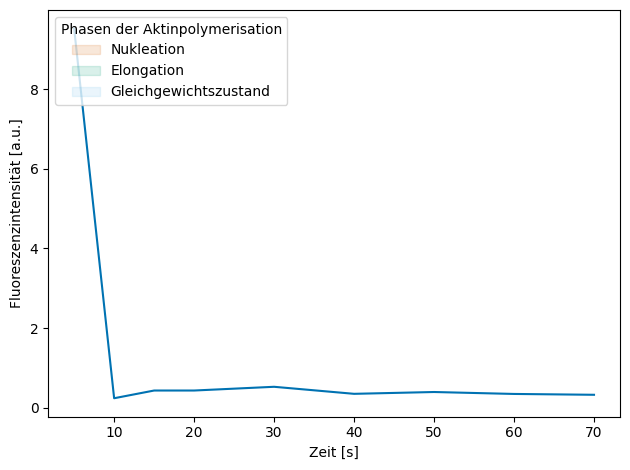

In [151]:
# Plot viscoisity time
x = df1.time_min
y = velocity_list[:9]

print(x, y)

plt.figure()
plt.plot(x, y, color="#0072B2", label="Messdaten")

# ---- ACHSEN ----
plt.xlabel("Zeit [s]")
plt.ylabel("Fluoreszenzintensität [a.u.]")

# ---- LEGENDE ----
plt.legend(handles=[lag, exp, plateau], loc="upper left", title="Phasen der Aktinpolymerisation")

plt.tight_layout()
plt.show()

0     5
1    10
2    15
3    20
4    30
5    40
6    50
7    60
8    70
Name: time_min, dtype: int64 [0.0003318202548793169, 0.01339289752550995, 0.010404268881801473, 0.01039979969413747, 0.010458025030350511, 0.01761299390334817, 0.015561705878556143, 0.017765619500430905, 0.01892557403825973]


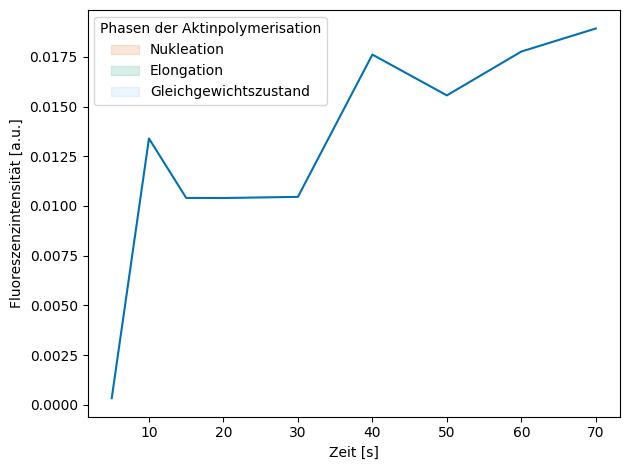

In [152]:
# Plot viscoisity time
x = df1.time_min
y = viscosity_list[:9]

print(x, y)

plt.figure()
plt.plot(x, y, color="#0072B2", label="Messdaten")

# ---- ACHSEN ----
plt.xlabel("Zeit [s]")
plt.ylabel("Fluoreszenzintensität [a.u.]")

# ---- LEGENDE ----
plt.legend(handles=[lag, exp, plateau], loc="upper left", title="Phasen der Aktinpolymerisation")

plt.tight_layout()
plt.show()

0     5
1    10
2    15
3    20
4    30
5    40
6    50
7    60
8    70
Name: time_min, dtype: int64 [26.923076923076923, 0.7692307692307693, 0.24570024570024568, 0.43478260869565216, 0.06666666666666667, 0.19230769230769232, 0.12048192771084337, 0.3395585738539898, 0.16393442622950818]


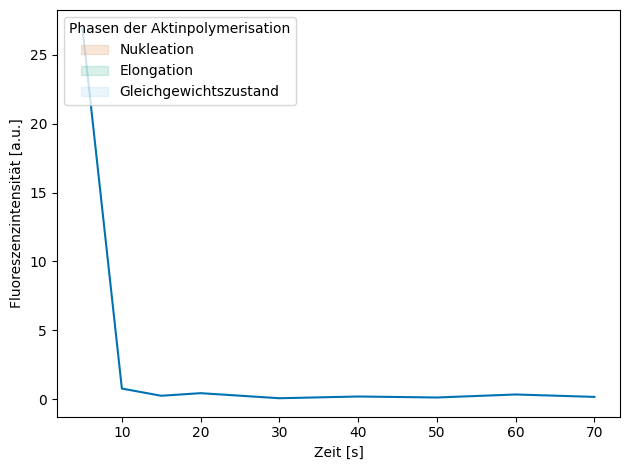

In [153]:
# Plot viscoisity time
x = df1.time_min
y = velocity_list[9:]

print(x, y)

plt.figure()
plt.plot(x, y, color="#0072B2", label="Messdaten")

# ---- ACHSEN ----
plt.xlabel("Zeit [s]")
plt.ylabel("Fluoreszenzintensität [a.u.]")

# ---- LEGENDE ----
plt.legend(handles=[lag, exp, plateau], loc="upper left", title="Phasen der Aktinpolymerisation")

plt.tight_layout()
plt.show()

In [154]:

viscosity_list_rm_index_9_plus_4 = viscosity_list.pop(13)


[5, 10, 15, 20, 40, 50, 60, 70] [0.00011737859356275155, 0.004108250774696304, 0.018189593792496562, 0.010279131627209358, 0.031746124193209865, 0.050671698231469595, 0.017979295336346745, 0.0372406456881885]


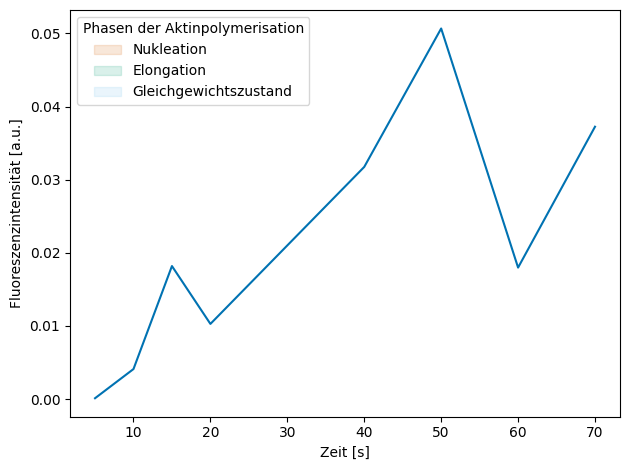

In [ ]:
# Plot viscoisity time
x = [5, 10, 15, 20, 40, 50, 60, 70]
y = viscosity_list[9:]

print(x, y)

plt.figure()
plt.plot(x, y, color="#0072B2", label="Messdaten")

# ---- ACHSEN ----
plt.xlabel("Zeit [s]")
plt.ylabel("Fluoreszenzintensität [a.u.]")

# ---- LEGENDE ----
plt.legend(handles=[lag, exp, plateau], loc="upper left", title="Phasen der Aktinpolymerisation")

plt.tight_layout()
plt.show()

# Fitting - sigmoidal

# Exp1 Plotting 

# Exp2 Plotting

# Exp3 Plotting